<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [436]:
df =pd.read_csv('/content/weatherAUS.csv (1).zip')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [437]:
df.shape

(145460, 23)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [439]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [440]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [441]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [442]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [444]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [445]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No


In [446]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [447]:
df.shape

(145460, 19)

In [448]:
df['Temp3pm'].isna().sum()

np.int64(0)

In [449]:
numerical_col =['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',
                'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                'Pressure3pm','Temp9am','Temp3pm']

categorical_col =['WindGustDir','WindDir9am',
                 'WindDir3pm','RainToday','RainTomorrow','WindGustDir','RainTomorrow']


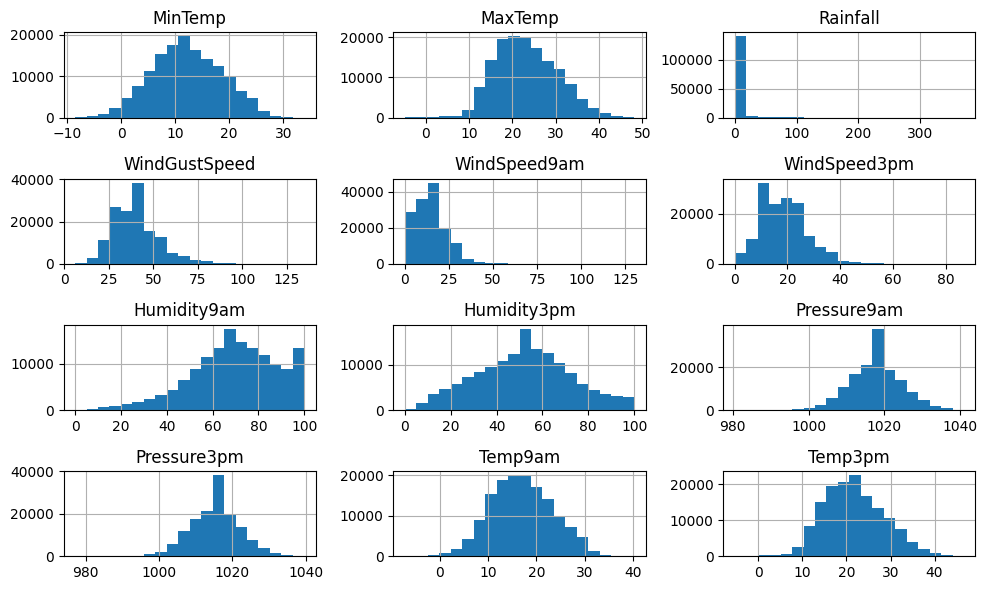

In [450]:
df[numerical_col].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

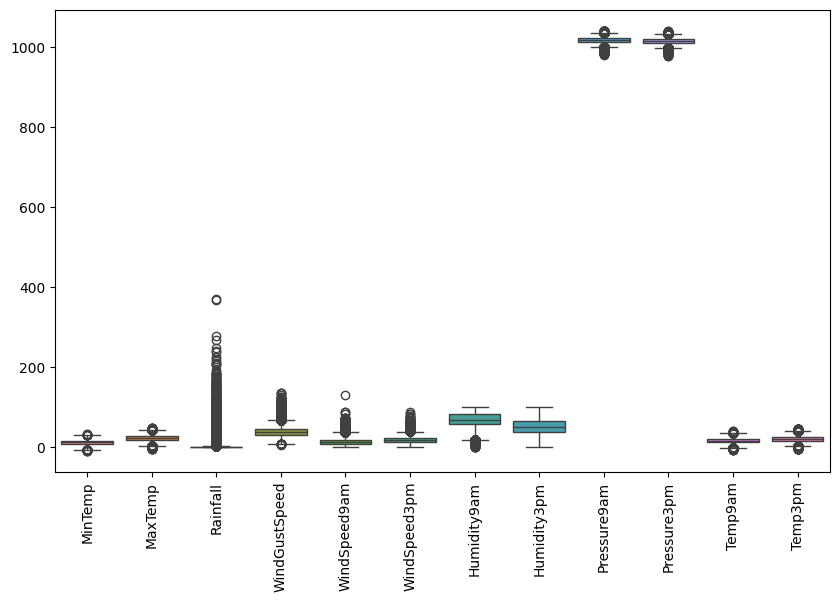

In [451]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_col])
plt.xticks(rotation=90)
plt.show()

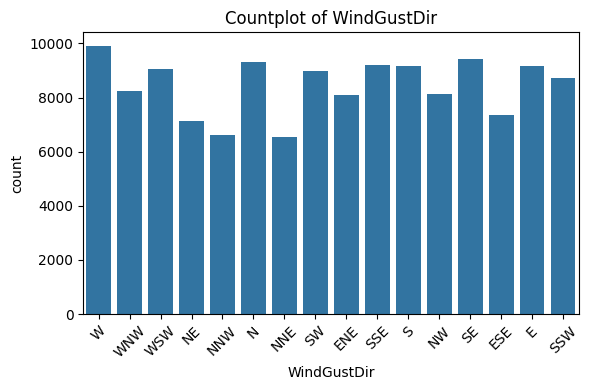

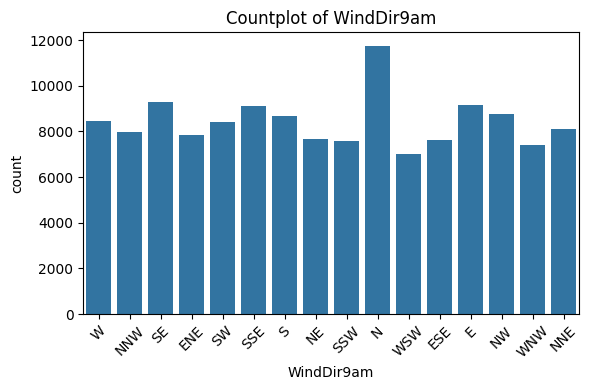

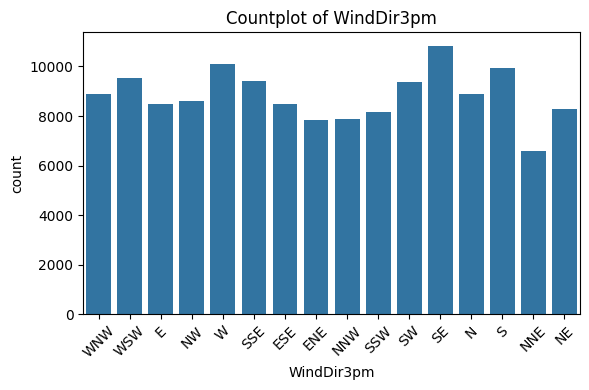

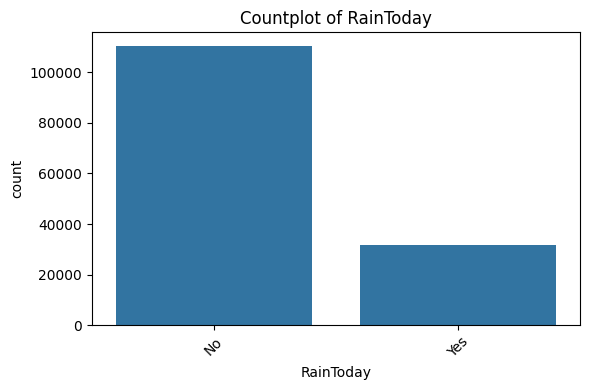

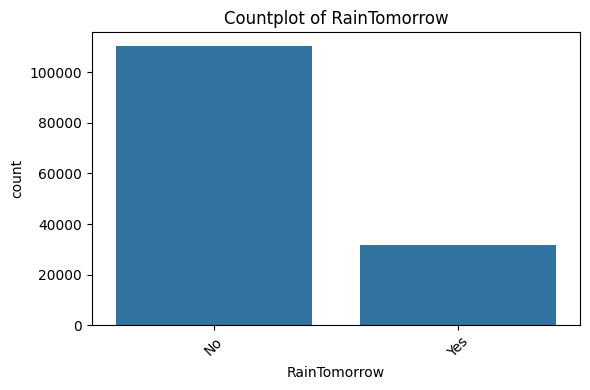

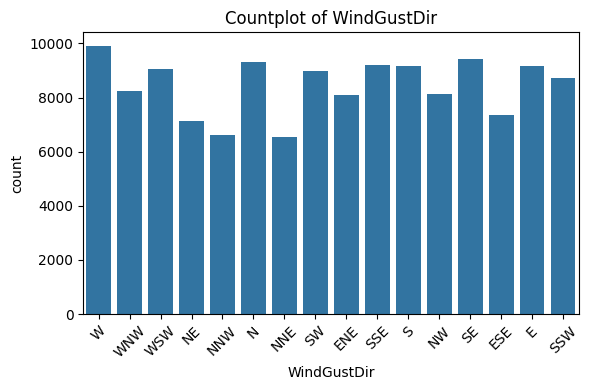

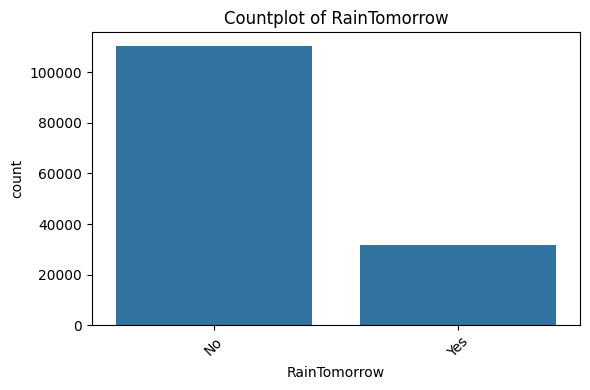

In [452]:
for c in categorical_col:
  plt.figure(figsize=(6, 4))
  sns.countplot(data=df, x=c)
  plt.title(f"Countplot of {c}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [453]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [454]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Year'] = df['Date'].dt.year
#df['Month'] = df['Date'].dt.month
#df['Day'] = df['Date'].dt.day

In [455]:
df.drop(['Date','Location'],axis=1,inplace=True)

In [456]:
# Identify all object (string) columns
object_cols = df.select_dtypes(include='object').columns

# Create one-hot encoded columns for these object columns
df_encoded_objects = pd.get_dummies(df[object_cols], dtype=int)

# Drop the original object columns from df
df_numeric_part = df.drop(columns=object_cols)

# Concatenate the numeric part with the new one-hot encoded columns
df_en = pd.concat([df_numeric_part, df_encoded_objects], axis=1)

df_en.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


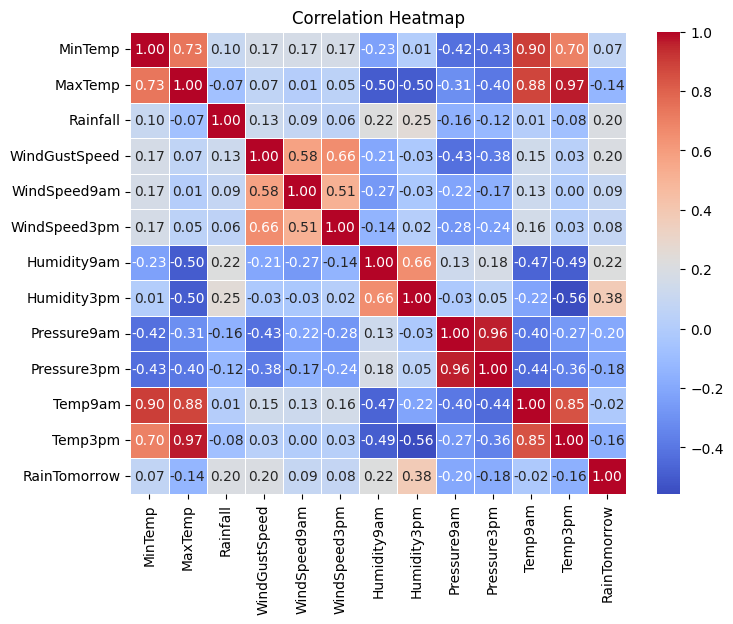

In [457]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_col +['RainTomorrow']].corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [458]:
df = df.drop(['Temp9am', 'Pressure3pm', 'Temp3pm'],axis=1)

In [459]:
temp_df = df_en.copy()
temp_df['RainTomorrow'] = y
corr = temp_df.corr()['RainTomorrow'].sort_values()
low_corr_features = corr[abs(corr) < 0.05]
print(corr)
print(low_corr_features)

Pressure9am     -0.197383
Pressure3pm     -0.180523
Temp3pm         -0.161030
MaxTemp         -0.135709
WindGustDir_E   -0.049382
                   ...   
Rainfall         0.202978
Humidity9am      0.220421
Humidity3pm      0.377098
RainToday        0.404622
RainTomorrow     1.000000
Name: RainTomorrow, Length: 62, dtype: float64
WindGustDir_E     -0.049382
WindDir9am_ESE    -0.047460
WindDir9am_E      -0.046485
WindDir9am_SE     -0.040897
WindGustDir_ESE   -0.039259
WindGustDir_ENE   -0.038481
WindDir3pm_ESE    -0.034676
WindDir3pm_E      -0.032896
WindDir9am_ENE    -0.031266
WindGustDir_SE    -0.030612
WindDir9am_SSE    -0.029764
WindGustDir_NE    -0.027243
WindDir3pm_NE     -0.026897
WindDir3pm_ENE    -0.026535
WindDir3pm_SE     -0.025741
Temp9am           -0.019689
WindDir3pm_SW     -0.018225
WindDir9am_S      -0.016249
WindGustDir_SSE   -0.013422
WindGustDir_SW    -0.013083
WindDir3pm_SSE    -0.012460
WindDir9am_NE     -0.010668
WindGustDir_SSW   -0.009339
WindDir9am_SSW    -0.00

In [460]:
df.drop(['Pressure9am','Pressure3pm','Temp3pm'], axis=1, inplace=True, errors='ignore')

In [461]:
current_numerical_col = [col for col in numerical_col if col in df.columns]
df[current_numerical_col].agg(['min','max','mean','median']).T

,min,max,mean,median
MinTemp,-8.5,33.9,12.194034,12.100000
MaxTemp,-4.8,48.1,23.221348,22.700000
Rainfall,0.0,371.0,2.360918,0.000000
WindGustSpeed,6.0,135.0,40.035230,39.000000
WindSpeed9am,0.0,130.0,14.043426,13.000000
WindSpeed3pm,0.0,87.0,18.662657,18.662657
Humidity9am,0.0,100.0,68.880831,69.000000
Humidity3pm,0.0,100.0,51.539116,51.539116


In [462]:
target_col = 'RainTomorrow'
x = df.drop(columns=[target_col]) # df.drop() ei jonno je x dataset e jeno na ase
y = df[target_col] # copy kore neya jonno
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [463]:
df = df_en

In [464]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [465]:
import numpy as np

scaler_std = StandardScaler()

# Make a copy to avoid modifying original x_train/x_test during processing
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

# Identify all object columns for one-hot encoding
object_cols_train = x_train_copy.select_dtypes(include='object').columns
object_cols_test = x_test_copy.select_dtypes(include='object').columns

# Apply one-hot encoding. pd.get_dummies will drop original columns if `columns` is specified.
x_train_processed = pd.get_dummies(x_train_copy, columns=object_cols_train, dtype=int)
x_test_processed = pd.get_dummies(x_test_copy, columns=object_cols_test, dtype=int)

# Align columns between x_train_processed and x_test_processed
# This is crucial for consistent feature sets
train_cols = set(x_train_processed.columns)
test_cols = set(x_test_processed.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    x_test_processed[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    x_train_processed[col] = 0

# Ensure the column order is the same
x_test_processed = x_test_processed[x_train_processed.columns]

# Check for any remaining non-numeric columns before scaling as a final safeguard
for df_name, df_proc in [('x_train_processed', x_train_processed), ('x_test_processed', x_test_processed)]:
    non_numeric_cols = df_proc.select_dtypes(exclude=np.number).columns
    if len(non_numeric_cols) > 0:
        # If any non-numeric columns persist, try to convert them to numeric, coercing errors
        # This is a fallback and indicates an issue in prior steps if it's needed
        for col in non_numeric_cols:
            df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce')
            # Fill any NaNs resulting from coercion (e.g., if a string truly couldn't be converted)
            # Filling with 0 is a simple strategy, but consider mean/median if appropriate
            df_proc[col] = df_proc[col].fillna(0)

# Finally, scale the data
x_train_scaled_std = scaler_std.fit_transform(x_train_processed)
x_test_scaled_std = scaler_std.transform(x_test_processed)

print("Preprocessing and scaling completed successfully.")
print("Shape of x_train_scaled_std:", x_train_scaled_std.shape)
print("Shape of x_test_scaled_std:", x_test_scaled_std.shape)

Preprocessing and scaling completed successfully.
Shape of x_train_scaled_std: (109095, 57)
Shape of x_test_scaled_std: (36365, 57)


In [466]:
x_train_std_df = pd.DataFrame(x_train_scaled_std, columns=x_train_processed.columns, index=x_train.index)
x_test_std_df = pd.DataFrame(x_test_scaled_std, columns=x_test_processed.columns, index=x_test.index)
display(x_train_std_df.head())
display(x_test_std_df.head())

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
58872,0.566788,-0.213615,2.027947,0.604792,-0.118172,-0.189643,0.960154,1.048769,1.505074,3.853261,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,4.256289,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.258170,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,4.166902,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
139797,2.027568,1.070906,-0.282491,-0.762475,0.333128,0.612697,0.747659,1.929160,-0.540014,-0.259520,-0.243216,-0.231209,-0.261567,4.421433,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,3.873419,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,4.095925,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
35460,-0.485603,-0.848817,-0.258672,-1.370149,-0.118172,-0.648123,0.110174,0.217289,-0.540014,-0.259520,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,4.106215,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,3.963173,-0.251582,-0.262046,-0.258170,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,4.023149,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
23651,1.352154,0.393356,-0.163396,0.452874,1.348553,1.300416,0.853906,1.440054,-0.540014,3.853261,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,3.837222,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.258170,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,4.020460,-0.239986,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
72475,0.472544,1.339102,-0.282491,0.604792,0.671603,0.612697,-0.899176,-1.543491,-0.540014,-0.259520,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,3.793614,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,3.837222,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.258170,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,3.526378,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
100721,0.441129,-0.608852,0.217707,1.060548,1.122903,1.415036,0.216422,0.608574,1.505074,-0.25952,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,4.576712,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,4.136431,-0.252323,-0.251582,-0.262046,-0.25817,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,3.978098,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
30234,0.142690,0.506281,-0.282491,-0.000206,0.897253,-0.418883,-0.421063,-1.445670,-0.540014,-0.25952,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.25817,-0.235012,-0.247833,4.012756,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,3.906532,-0.264951
68427,1.069422,0.816825,-0.001318,1.440345,2.815278,0.383457,-1.005424,-0.663101,3.550163,-0.25952,-0.243216,-0.231209,3.823118,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,3.373675,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.25817,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,3.910571,-0.244145,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
28624,0.928056,1.268524,-0.282491,-0.762475,-1.584898,-0.189643,1.597639,-0.027263,-0.540014,-0.25952,-0.243216,-0.231209,-0.261567,4.421433,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,-0.251582,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.25817,-0.235012,-0.247833,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,4.095925,-0.217737,-0.237972,-0.251376,-0.270495,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951
31173,0.268349,-0.510042,1.384836,0.756711,0.333128,0.383457,1.119525,0.608574,1.505074,-0.25952,-0.243216,-0.231209,-0.261567,-0.226171,-0.216997,-0.218497,-0.243533,-0.260645,-0.263601,-0.259561,3.974840,-0.256773,-0.271722,-0.244714,-0.257644,-0.260605,-0.237714,-0.234946,-0.296413,-0.235597,-0.242412,-0.241754,-0.252323,-0.251582,-0.262046,-0.25817,-0.235012,4.034973,-0.249205,-0.232241,-0.224937,-0.248728,-0.239986,-0.248562,-0.255717,-0.244145,-0.217737,-0.237972,-0.251376,3.696924,-0.283577,-0.26372,-0.242242,-0.262286,-0.273411,-0.255982,-0.264951


In [467]:
from sklearn.linear_model import LogisticRegression

model = RandomForestClassifier()
model.fit(x_train_scaled_std, y_train)


RandomForestClassifier()

In [468]:
y_pred = model.predict(x_test_scaled_std)

In [469]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8327237728585178
[[26199  1209    75]
 [ 4225  3726    87]
 [  385   102   357]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     27483
           1       0.74      0.46      0.57      8038
           2       0.69      0.42      0.52       844

    accuracy                           0.83     36365
   macro avg       0.76      0.61      0.66     36365
weighted avg       0.82      0.83      0.82     36365



In [470]:
submission = pd.DataFrame({
    'PatientID': x_test.index,
    'Diagnosis': y_pred
})
submission.to_csv('submission.csv', index=False)